# Understand Customers

**Tasks**

In [3]:
import pandas as pd

0. Please read the `customers.csv` file to use as your dataset to explore the following:

In [1]:
import os

os.listdir('.')

['customers.csv',
 'customers_cleaned.csv',
 'customers_exercise copy.ipynb',
 'customers_exercise.ipynb',
 'customers_solution.ipynb']

In [9]:
df = pd.read_csv('customers.csv', index_col='customer_id')

In [10]:
df.head()

,name,dob,gender,visits
customer_id,,,,
1,Jamila,1989-01-12,F,23
2,Omar,1983-04-03,M,17
3,Murad,1993-12-09,M,12
4,Aaliyah,1977-09-14,F,38
5,Abdulrahman,1991-02-18,M,10


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 1 to 50
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    50 non-null     object
 1   dob     50 non-null     object
 2   gender  50 non-null     object
 3   visits  50 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 2.0+ KB


1. rename column: dob to date_of_birth


In [14]:
df.rename(columns={'dob': 'date_of_birth'}, inplace=True)  # <-- note: inplace=True

In [15]:
df.head()

,name,date_of_birth,gender,visits
customer_id,,,,
1,Jamila,1989-01-12,F,23
2,Omar,1983-04-03,M,17
3,Murad,1993-12-09,M,12
4,Aaliyah,1977-09-14,F,38
5,Abdulrahman,1991-02-18,M,10


2. inspect the gender column and handle any inconsistencies (hint: `value_counts`)


In [17]:
df['gender'].value_counts()

gender
M         26
F         18
Female     4
Male       2
Name: count, dtype: int64

In [21]:
df['gender'].replace({
    'Male': 'M',
    'Female': 'F',
}, inplace=True) # <-- note: inplace=True

In [22]:
df['gender'].value_counts()

gender
M    28
F    22
Name: count, dtype: int64

3. add new column: age_in_days


In [25]:
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])

In [26]:
df['date_of_birth'].dtype

dtype('<M8[ns]')

customer_id
1     12858
2     14969
3     11066
4     16996
5     12091
6     14288
7     11764
8     11357
9     10963
10    10566
11    10169
12     9772
13     9376
14     8979
15    13695
16    13322
17    12922
18    12532
19    12352
20    12139
21     7382
22     9189
23    11010
24    10998
25     4786
26     4776
27    11696
28    10937
29    12129
30    12090
31    10942
32    11237
33    10902
34    10931
35    12085
36    11351
37     8825
38     8183
39     6327
40     5931
41     7058
42     5598
43     8401
44     7823
45    11052
46     9683
47     8995
48     9400
49    10161
50    10170
Name: date_of_birth, dtype: int64

- Current customer age: `(pd.Timestamp.now() - df['date_of_birth']).dt.days`
- Age of customer since 2024: `2024 - df['date_of_birth'].dt.year`

In [38]:
# df['age'] = (pd.Timestamp.now() - df['date_of_birth']).dt.days
df['age'] = 2024 - df['date_of_birth'].dt.year
df['age_in_days'] = df['age'] * 365

In [39]:
df['age']

customer_id
1     35
2     41
3     31
4     47
5     33
6     39
7     32
8     31
9     30
10    29
11    28
12    27
13    26
14    25
15    38
16    37
17    36
18    35
19    34
20    33
21    20
22    25
23    30
24    30
25    13
26    13
27    32
28    30
29    33
30    33
31    30
32    31
33    30
34    30
35    33
36    31
37    24
38    23
39    18
40    17
41    20
42    16
43    23
44    22
45    31
46    27
47    25
48    26
49    28
50    28
Name: age, dtype: int32

In [40]:
df['age_in_days']

customer_id
1     12775
2     14965
3     11315
4     17155
5     12045
6     14235
7     11680
8     11315
9     10950
10    10585
11    10220
12     9855
13     9490
14     9125
15    13870
16    13505
17    13140
18    12775
19    12410
20    12045
21     7300
22     9125
23    10950
24    10950
25     4745
26     4745
27    11680
28    10950
29    12045
30    12045
31    10950
32    11315
33    10950
34    10950
35    12045
36    11315
37     8760
38     8395
39     6570
40     6205
41     7300
42     5840
43     8395
44     8030
45    11315
46     9855
47     9125
48     9490
49    10220
50    10220
Name: age_in_days, dtype: int32

4. add new column: month_of_birth (hint: use `df[<column>].dt.month`)


In [50]:
df['month_of_birth'] = df['date_of_birth'].dt.month
df['month_of_birth']


customer_id
1      1
2      4
3     12
4      9
5      2
6      2
7      1
8      2
9      3
10     4
11     5
12     6
13     7
14     8
15     9
16    10
17    11
18    12
19     6
20     1
21     1
22     1
23     2
24     2
25     2
26     2
27     3
28     4
29     1
30     2
31     4
32     6
33     5
34     4
35     2
36     2
37     1
38    10
39    11
40    12
41    11
42    11
43     3
44    10
45    12
46     9
47     8
48     7
49     6
50     5
Name: month_of_birth, dtype: int32

In [ ]:
# (Optional)
# month_map = {
#     1: 'January',
#     2: 'February',
#     3: 'March',
#     4: 'April',
#     5: 'May',
#     6: 'June',
#     7: 'July',
#     8: 'August',
#     9: 'September',
#     10: 'October',
#     11: 'November',
#     12: 'December'
# }

# df['month_of_birth'].replace(month_map)

5. save the dataset to a new file: `customers_cleaned.csv`


In [52]:
df.to_csv('customers_cleaned_v2.csv')

6. average number of visits


In [53]:
df.head()

,name,date_of_birth,gender,visits,age,age_in_days,month_of_birth
customer_id,,,,,,,
1,Jamila,1989-01-12,F,23,35,12775,1
2,Omar,1983-04-03,M,17,41,14965,4
3,Murad,1993-12-09,M,12,31,11315,12
4,Aaliyah,1977-09-14,F,38,47,17155,9
5,Abdulrahman,1991-02-18,M,10,33,12045,2


In [56]:
df['visits'].mean()

25.68

7. list the 5 most common names of customers and the 5 least common names


In [67]:
name_counts = df['name'].value_counts()

In [68]:
name_counts.head(5)

name
Omar      2
Layla     2
Salim     1
Aisha     1
Yasmin    1
Name: count, dtype: int64

In [69]:
name_counts.tail(5)

name
Nouf     1
Sara     1
Reem     1
Farah    1
Zahra    1
Name: count, dtype: int64

8. the age range of male customers

Range = (max - min)

In [80]:
mask = df['gender'] == 'M'
df[mask]

,name,date_of_birth,gender,visits,age,age_in_days,month_of_birth
customer_id,,,,,,,
2,Omar,1983-04-03,M,17,41,14965,4
3,Murad,1993-12-09,M,12,31,11315,12
5,Abdulrahman,1991-02-18,M,10,33,12045,2
6,Ahmad,1985-02-12,M,45,39,14235,2
7,Khalid,1992-01-11,M,31,32,11680,1
8,Faisal,1993-02-21,M,25,31,11315,2
9,Saud,1994-03-22,M,34,30,10950,3
10,Naif,1995-04-23,M,19,29,10585,4
11,Hassan,1996-05-24,M,27,28,10220,5


In [82]:
# df.loc[df['gender'].isin(['M', 'Male'])]
males = df[df['gender'] == 'M']
females = df[df['gender'] == 'F']

In [85]:
age_range_male = males['age'].max() - males['age'].min()
print(males['age'].max(), males['age'].min())

age_range_female = females['age'].max() - females['age'].min()
print(females['age'].max(), females['age'].min())

print(age_range_male, age_range_female)

41 13
47 20
28 27


9. the age range of female customers


10. what is the difference between the oldest and youngest customer? (hint: use `max` and `min`)


In [86]:
df['age'].max() - df['age'].min()

34

11. the mean age of customers grouped by gender (hint: use `groupby` and `mean`)


In [91]:
df.groupby('gender')['age'].mean()

gender
F    31.136364
M    26.928571
Name: age, dtype: float64

12. count the number of customers born in each month


In [98]:
df.groupby('month_of_birth')['month_of_birth'].count()

month_of_birth
1      7
2     10
3      3
4      5
5      3
6      4
7      2
8      2
9      3
10     3
11     4
12     4
Name: month_of_birth, dtype: int64

In [97]:
df['month_of_birth'].value_counts().sort_index()

month_of_birth
1      7
2     10
3      3
4      5
5      3
6      4
7      2
8      2
9      3
10     3
11     4
12     4
Name: count, dtype: int64

13. plot the number of customers born in each month


<Axes: xlabel='month_of_birth'>

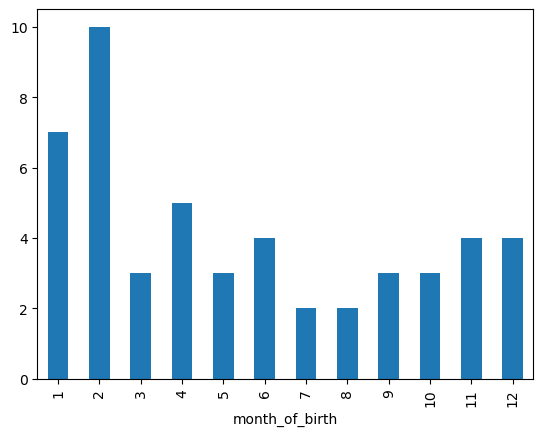

In [100]:
df['month_of_birth'].value_counts().sort_index() \
    .plot(kind='bar')

14. plot the histogram of age for both genders, and then separately (males and females)


<Axes: ylabel='Frequency'>

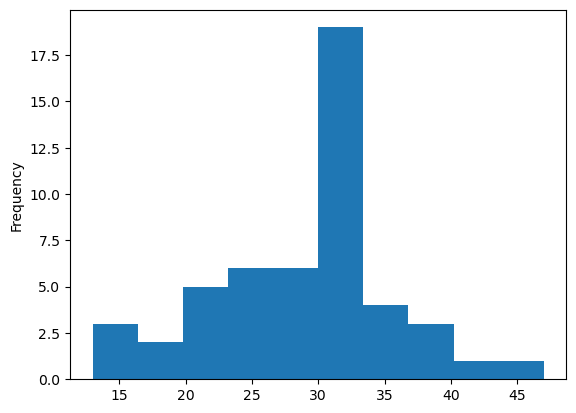

In [101]:
df['age'].plot.hist()

<Axes: ylabel='Frequency'>

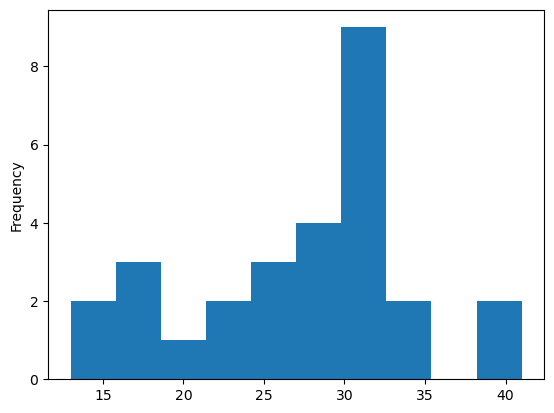

In [103]:
males['age'].plot.hist()

<Axes: ylabel='Frequency'>

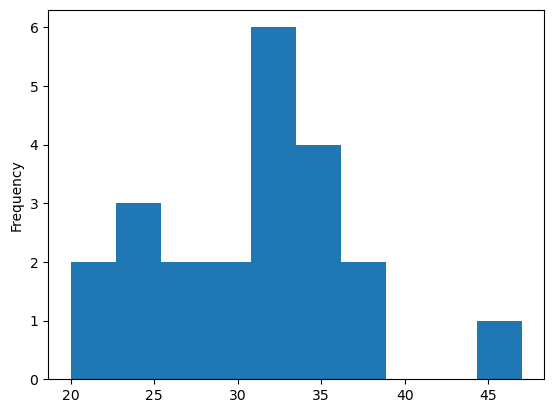

In [104]:
females['age'].plot.hist()

15. scatter plot of age vs. visits (is there a correlation?)


<Axes: xlabel='age', ylabel='visits'>

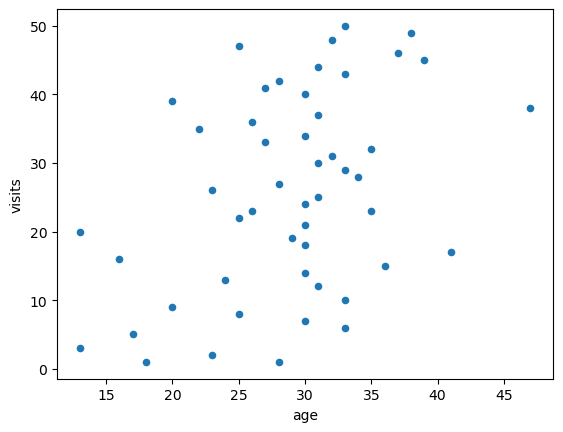

In [105]:
df.plot.scatter(x='age', y='visits')

16. use `pd.cut` to create age groups and then plot the number of visits for each age group: 0-20, 21-40, 41-60, 61-80, 81-100

<Axes: xlabel='age'>

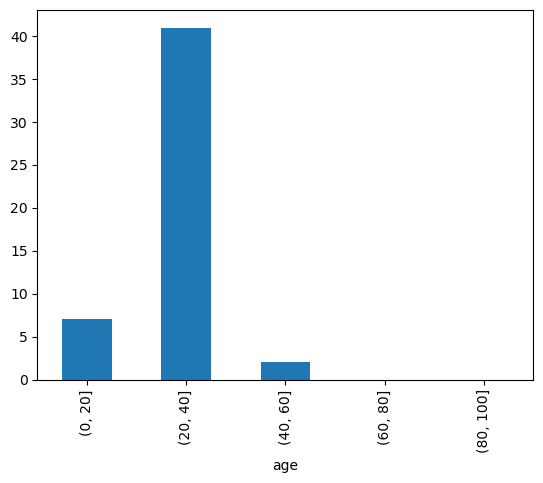

In [110]:
pd.cut(df['age'], bins=[0, 20, 40, 60, 80, 100]).value_counts().sort_index().plot.bar()

In [113]:
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 40, 60, 80, 100])
df.head()

,name,date_of_birth,gender,visits,age,age_in_days,month_of_birth,age_group
customer_id,,,,,,,,
1,Jamila,1989-01-12,F,23,35,12775,1,"(20, 40]"
2,Omar,1983-04-03,M,17,41,14965,4,"(40, 60]"
3,Murad,1993-12-09,M,12,31,11315,12,"(20, 40]"
4,Aaliyah,1977-09-14,F,38,47,17155,9,"(40, 60]"
5,Abdulrahman,1991-02-18,M,10,33,12045,2,"(20, 40]"


<Axes: xlabel='age_group'>

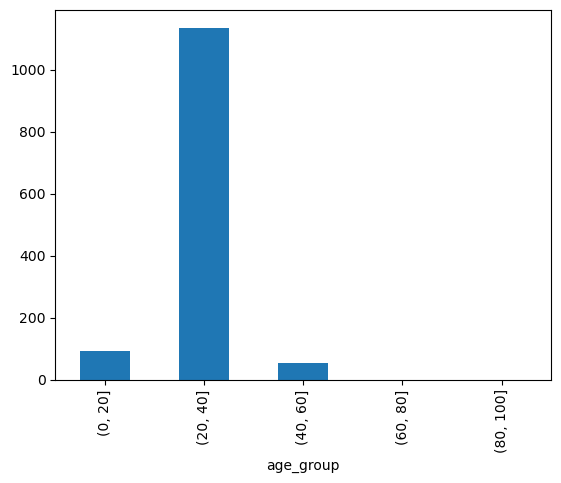

In [123]:
df.groupby('age_group')['visits'].sum().plot.bar()

<Axes: xlabel='age_group'>

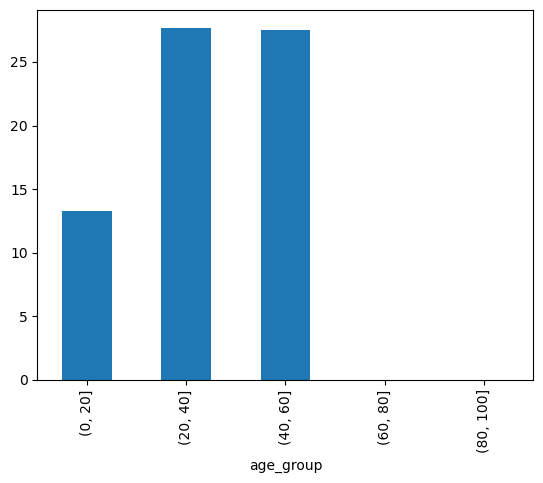

In [124]:
df.groupby('age_group')['visits'].mean().plot.bar()

<Axes: ylabel='Frequency'>

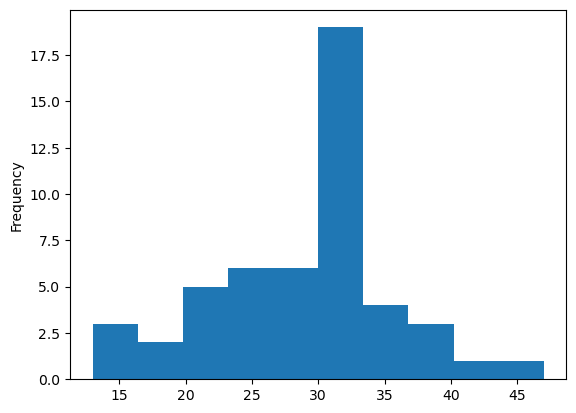

In [122]:
df['age'].plot.hist()


17. is there any significant difference between the number of visits for older people vs. younger people? (hint: plot the number of visits for each age group)